# Voter Registration Midterm Project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -q geopandas
import geopandas as gpd

In [3]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

# Introduction
## Project Purpose
This project aims to analyze voter registration trends in the U.S. to identify when and where voter registration is highest. 

## Project Goals
By analyzing the data through visualization and statistical methods, we aim to understand the factors that drive variations in voter registration over time and across different states. Additionally, we will examine the dataset’s limitations and assess how they may impact our interpretation of trends. By recognizing these constraints, we can develop a more accurate approach to drawing meaningful conclusions from the data.

## Why is this important?
This notebook is important because understanding voter registration trends can help future policymakers understand how to improve voter outreach efforts. Additionally, analyzing differences between states can highlight how a variety of factors can impact registration numbers, such as population size, demographics, etc. can impact registration numbers. Finally, working with voter data will address a number of potential limitations and discrepancies within the data that may limit a holistic overview of the factors that contribute to a high voter turnout for a state, raising awareness and literacy to help us draw stronger and more accurate conclusions about the data.

## Research Questions

1.) How do voter registration trends vary by month across all states in the dataset, and what limitations should be considered when interpreting these trends?

2.) How does the average voter registration in California compare to Delaware based on the dataset, and what factors might explain the differences?

We will investigate this by loading and assessing the data, beginning with **Data Processing**:

In [5]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


After yielding the first five rows of the dataset, we can clearly see each of the variables attributed to each column of the dataset. The "Jurisdiction" column refers to which region (state) in the United States the voter registration occurred. The "year" column refers to the year in which the registrations were recorded. The "month" column refers to the month when the registrations were recorded. The "new registered voters" column refers to the number of new voter registrations in that jurisdiction within the specified month or year.

Before we start analyzing the data, we have to make sure there are no null values in our dataset:

In [7]:
voters.isnull().values.any()

False

This means we can proceed with the current dataset without having to drop any values.
Next, we will check the data types present in our dataset: **int64**, **float64**, **datetime64**, and/or **object**, which indicates a non-numerical value, typically a string:

In [9]:
voters.dtypes

Jurisdiction             object
Year                      int64
Month                    object
New registered voters     int64
dtype: object

Now, we know that the two data types present in voters are **object** (strings) and **int64** (integers).

To make our understanding of the data even clearer, we are going to rename some of the columns so that it is easier to read.

In [77]:
voters = voters.rename(columns={"Jurisdiction":"NAME","New registered voters":"registered_voters"})
print(voters)

         NAME  Year Month  registered_voters  high_voters
0     Arizona  2016   Jan              25852        False
1     Arizona  2016   Feb              51155         True
2     Arizona  2016   Mar              48614         True
3     Arizona  2016   Apr              30668        False
4     Arizona  2020   Jan              33229        False
..        ...   ...   ...                ...          ...
101  Virginia  2020   Jan              25934        False
102  Virginia  2020   Feb              29507        False
103  Virginia  2020   Mar              31492        False
104  Virginia  2020   Apr               5467        False
105  Virginia  2020   May               8239        False

[106 rows x 5 columns]


Even though we've made the dataset a bit easier to read, and ensured that it's clean, there are still several limitations within this set.
A few include:

**1.) Lack of demographic information:** 

•The dataset does not include voter demographics such as age, race, gender, or political affiliation. Additionally, we are only given the number of registered voters, but we don't know exactly what percentage of the eligible voter population has actually registered, which is information that may make the data more holistic. 

**2.)Limited State Representation:**

The dataset only includes a few states, meaning it does not reflect nationwide voter trends. Without data from all 50 states, conclusions about national patterns can potentially be misleading.

**3.)Only two election years:**

The dataset only covers 2016 and 2020, both of which were presidential election years. This means we can’t see long-term trends (e.g., whether voter registration has increased or decreased over multiple elections, or see the difference in years where midterm elections took place.)

**4.) Incomplete time coverage:**

The dataset only covers Jan-May, which makes it difficult to understand how the data is affected around the months leading up to the general presidential election, a timeframe where voter registration is likely to spike. 

## Exploratory Data Analysis

### When was the highest amount of voter registration?

In [16]:
voters.loc[voters.registered_voters == voters.registered_voters.max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


The highest amount of voter registration occurred in February 2020, specifically in California.



### What is the average voter registration?

In [19]:
mean_value = voters.registered_voters.mean()
print(f"{mean_value:.2f}")

48223.46


The average voter registration across the United States based on the 'voters' dataset is 48,223.

### How many instances in the data are there in which the number of registered voters is higher than the mean?

In [22]:
high_voters = voters.loc[voters.registered_voters>=voters.registered_voters.mean()]
high_voters.registered_voters.count()

36

There are 36 instances of the voter registration being higher than the mean at a given point in time within the dataset.

### How many times did each state go above the national average for new voter registration? 

In [26]:
voters["high_voters"] = voters["registered_voters"]>=48223
voters.head()

,NAME,Year,Month,registered_voters,high_voters
0,Arizona,2016,Jan,25852,False
1,Arizona,2016,Feb,51155,True
2,Arizona,2016,Mar,48614,True
3,Arizona,2016,Apr,30668,False
4,Arizona,2020,Jan,33229,False


In [27]:
voters.loc[voters.high_voters==True].head()

,NAME,Year,Month,registered_voters,high_voters
1,Arizona,2016,Feb,51155,True
2,Arizona,2016,Mar,48614,True
5,Arizona,2020,Feb,50853,True
8,California,2016,Jan,87574,True
9,California,2016,Feb,103377,True


In [28]:
high_voters_count = voters.loc[voters.high_voters==True]

In [29]:
high_voters_count.NAME.value_counts()

NAME
Texas             8
California        7
Florida           7
North Carolina    6
Illinois          4
Arizona           3
Georgia           1
Name: count, dtype: int64

The state with the highest quantity of instances of the voter registration exceeding the mean is Texas, with eight, then California with 7, Florida with 7, 
North Carolina with 6, Illinois with 4, Arizona with 3, and Georgia with 1.

### Which three states had the highest average voter registration overall?

In [32]:
highest_state=voters.groupby("NAME")["registered_voters"].mean()
highest_state.sort_values(ascending = False).head(3)

NAME
California    144545.375
Texas         114610.100
Florida        65868.125
Name: registered_voters, dtype: float64

The three states with the highest average voter registration overall according to the dataset are California, Texas, and Florida

## Data Visualization

Now that we have gone in depth with data exploration, we are going to visualize some key trends in the data to further our understanding in trends across states for analysis.

#### First, we are going to create a bar plot showing voter registration by state.

In [89]:
voters.head()

,NAME,Year,Month,registered_voters,high_voters
0,Arizona,2016,Jan,25852,False
1,Arizona,2016,Feb,51155,True
2,Arizona,2016,Mar,48614,True
3,Arizona,2016,Apr,30668,False
4,Arizona,2020,Jan,33229,False


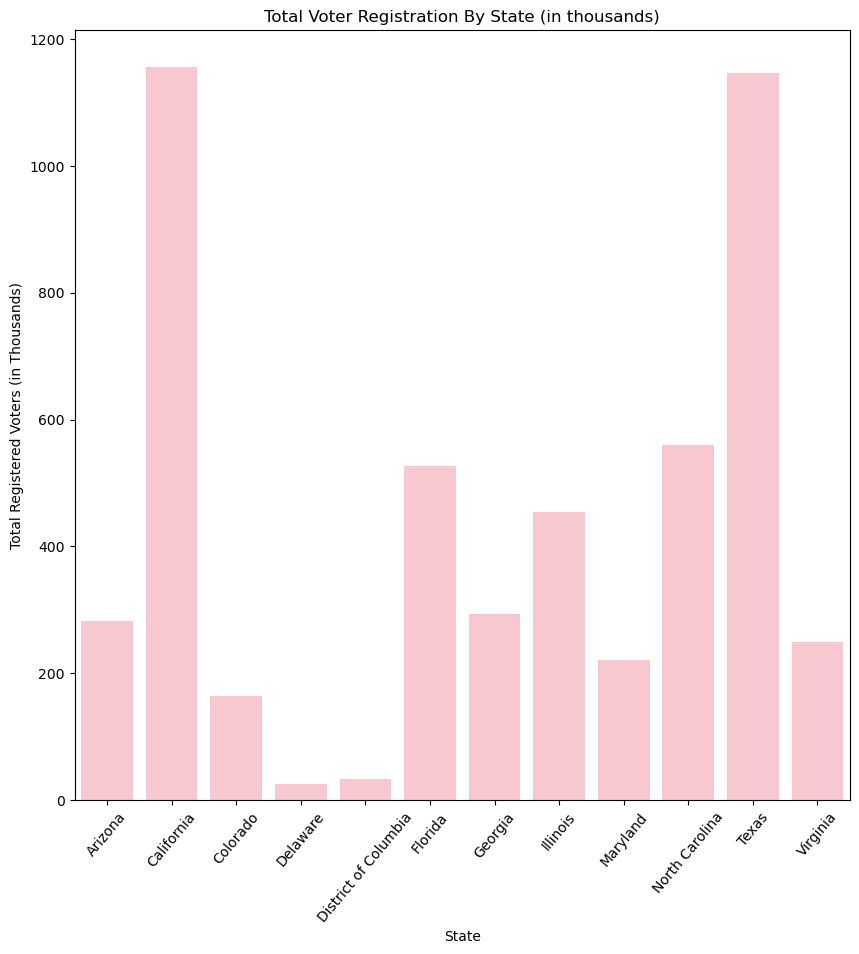

In [99]:
state_voter_totals = voters.groupby("NAME")["registered_voters"].sum().reset_index()
state_voter_totals["reg_voters_thousands"] = state_voter_totals["registered_voters"] / 1000

plt.figure(figsize=(10,10))

sns.barplot(state_voter_totals, x="NAME", y="reg_voters_thousands", color="pink")

plt.xlabel("State")
plt.ylabel("Total Registered Voters (in Thousands)")
plt.title("Total Voter Registration By State (in thousands)")

plt.xticks(rotation=50)
plt.show()


Based on the bar plot showing the total voter registration by state, I can identify that the state with the lowest registration is Delaware, and the highest is California. Due to the previously mentioned limitations of the data set, the main insight I feel that I can gather from this visualization is that these patterns correspond with the state population size.

#### Next, we are going to create a bar plot comparing voter registration by state turnout in 2016 vs. 2020.

In [38]:
colors = ["#3F054F","#CAA8F5"]

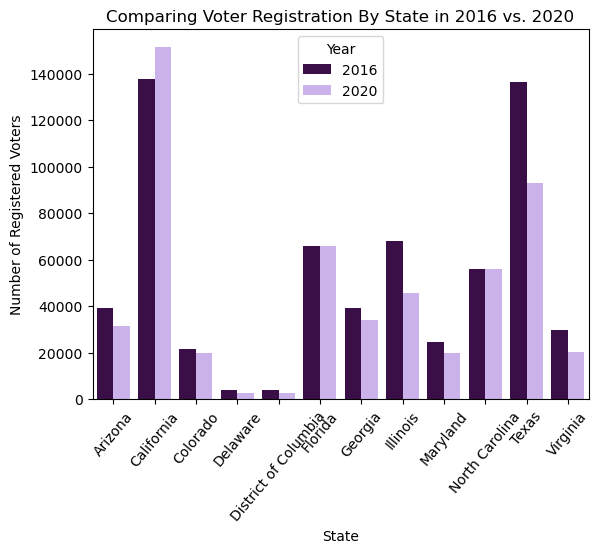

In [118]:
sns.barplot(voters, x="NAME",y="registered_voters", hue="Year",palette=colors, errorbar=None)
plt.xlabel("State")
plt.ylabel("Number of Registered Voters")
plt.title("Comparing Voter Registration By State in 2016 vs. 2020")

plt.xticks(rotation = 50)
plt.show()

Once again, I can extrapolate that the states with the higher turnout distribution amongst both election years correspond to their respective populations. 
Texas, in particular, had the highest voter turnout in 2016 compared to 2020 for all states, followed by Illinois. Florida and North Carolina had approximately the same turnout across the years. All of the other states relay a similar pattern of having a lower registration in 2020 in comparison to 2016. Considering the variation in region for these particular states, it is safe to assume that the explanation for an overall lower turnout in 2020 can be attributed to the restrictions of the COVID-19 pandemic, as well as the data only representing January-May of that year, which is not peak election season.

#### Finally, for the last chart, we are going to create a barplot that corresponds with my first research question -- How do voter registration trends vary by month across all states in the dataset?

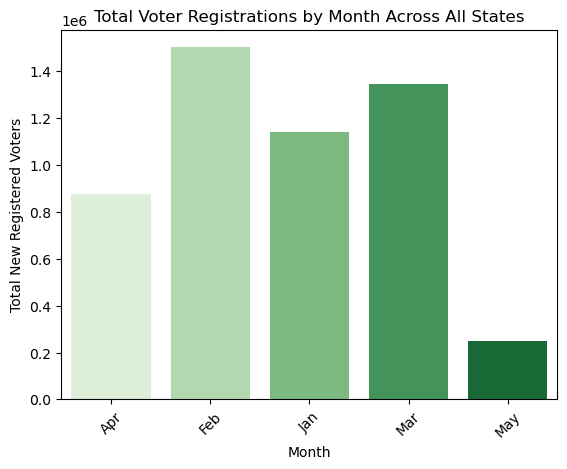

In [80]:
monthly_registrations = voters.groupby("Month")["registered_voters"].sum().reset_index()

sns.barplot(monthly_registrations, x="Month",y="registered_voters", hue="Month", palette="Greens")
plt.xlabel("Month")
plt.ylabel("Total New Registered Voters")
plt.title("Total Voter Registrations by Month Across All States")
plt.xticks(rotation=45)

plt.show()

Based on the chart, we can see that across the data, February is the month with the highest number of voter registration, and May is the lowest. The data makes it appear as if February is always the peak registration month, but this could be misleading because we are missing months where voter registration is typically high, like September and October. May appears as the lowest registration month, but this might not hold if we had the full year’s data, for example, summer months (June, July, August) could be even lower, and fall months (September, October) could be much higher.

Finally, we will visualize the data on a US map.
## Mapping

In [42]:
shapefile_path = "325-Datasets/cb_2018_us_state_500k.shp"
states = gpd.read_file(shapefile_path)

In [43]:
minx, miny, maxx, maxy =  -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx,miny:maxy]

In [44]:
voters_state_avg = voters.groupby("NAME")["registered_voters"].mean().reset_index()

In [45]:
map_state_voters = bbox.merge(voters_state_avg,on="NAME",how="inner")

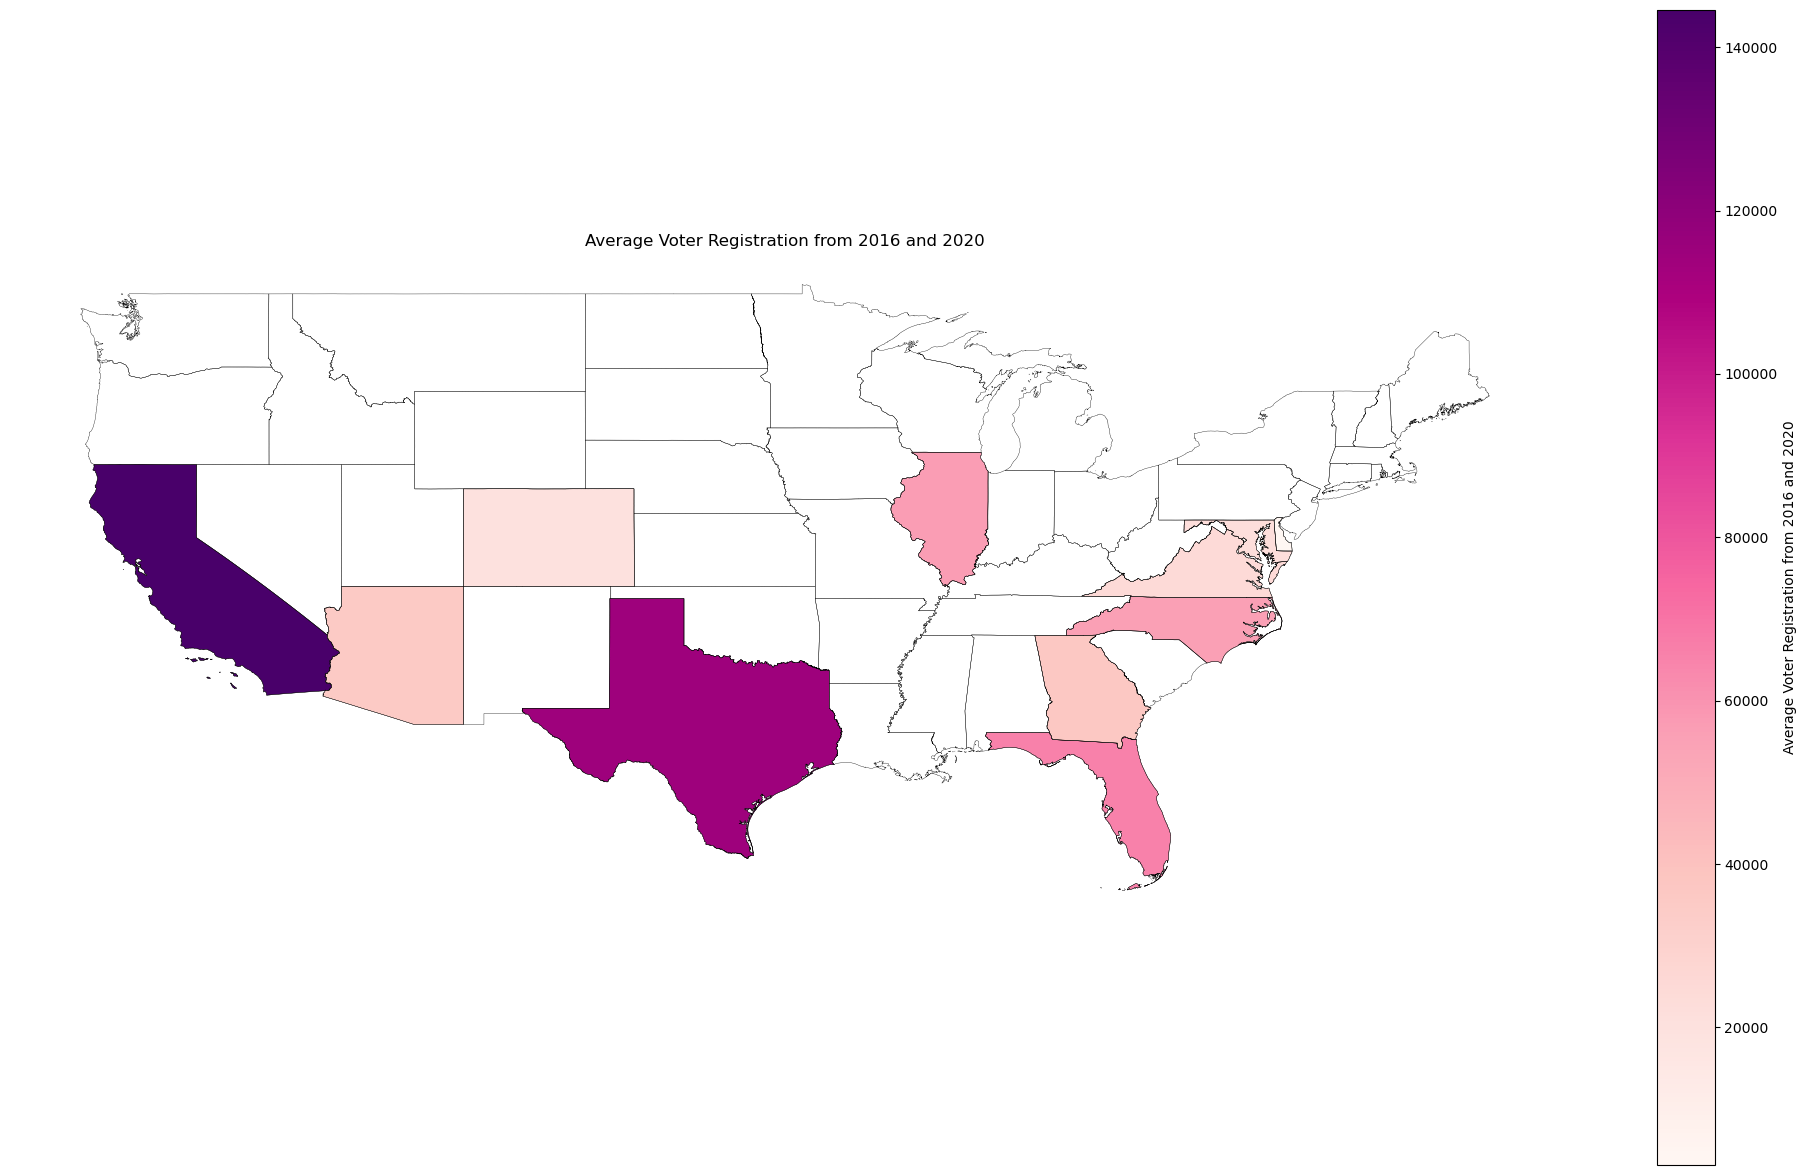

In [46]:
us_map = bbox.boundary.plot(linewidth=.25,color="black",figsize=(25,15))
map_state_voters.plot(column = "registered_voters", ax=us_map, legend = True,
                      cmap='RdPu',edgecolor="black",linewidth=.25,
                      legend_kwds={"label":"Average Voter Registration from 2016 and 2020",
                                  "orientation":"vertical"})
plt.title("Average Voter Registration from 2016 and 2020")
us_map.axis("off")
plt.show()

## Conclusion

Through this analysis, we identified key patterns in voter registration trends. First, voter registration numbers tend to be highest in February, which may be due to early-year election deadlines and primary season. In contrast, May consistently shows lower registration numbers, possibly because there are fewer immediate election deadlines or voter outreach campaigns. Additionally, comparing California and Delaware leads me to believe that larger states naturally have higher registration numbers, but adjusting voter registration numbers based on the total eligible population of a state, rather than just using raw registration counts, it is difficult to determine which state has a higher registration rate. Lastly, because the dataset only includes 11 states (and DC) and two election years (2016 and 2020), this further limits the ability to generalize findings to the entire U.S.

To gain a clearer understanding of voter registration trends, it is recommended to obtain full-year data to capture registration activity in the months leading up to the general election, particularly September and October, when registration deadlines occur. Additionally, it would be beneficial to include more states, as having only 11 states limits the ability to make national-level conclusions. Another important factor to consider is voter eligibility and total population per state, as raw registration numbers can be misleading without knowing the percentage of eligible voters who are registering. Lastly, incorporating demographic information (such as age, race, and party affiliation) could provide clearer insights into voter registration behaviors.


If continuing this project, the next step would be to expand the dataset to include all 50 states and multiple election cycles (not just 2016 and 2020) to determine if the trends we observed hold over time. Additionally, we would normalize the data by state population to ensure that larger states are not overrepresented simply due to their size. Another key next step would be to explore policy impacts, such as whether voter registration laws (same-day registration, automatic registration), or voter outreach efforts (frequency of mail/text message reminders, availability of registration, etc) per state, influence the trends we see. By incorporating these factors, we could provide more actionable insights to election officials and policymakers.
